In [44]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



0.20148000000000002


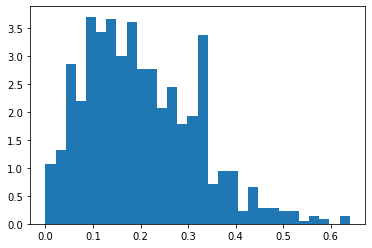

In [45]:
model_prior = CmdStanModel(stan_file='lab3_prior.stan')

samples = model_prior.sample(fixed_param=True, iter_sampling=1000)

p = samples.stan_variable("p")
y = samples.stan_variable("y")

ratio = y/50
plt.hist(ratio, bins=30, density=True)
# mean is around very close to 0.2, becouse in beta distribution beta = 4*alpha
print(ratio.mean())


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)



Expected value of predicted ratio: 0.202
94% density interval of predicted ratio: [0.08 0.36]
Expected value of parameter p: 0.201
94% density interval of parameter p: [0.108 0.296]
Probability that ratio is lower than the average probability from traditional vaccines: 0.51475


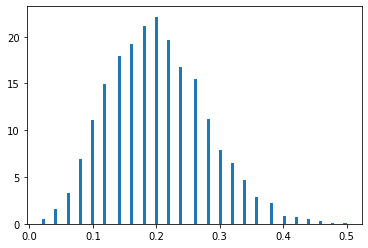

In [60]:
data = {'N': 50, 'y':10}

model = CmdStanModel(stan_file="lab3_post.stan")
samples = model.sample(data=data)

y_pred = samples.stan_variable('y_pred')
ratio_pred = y_pred/data['N']
p = samples.stan_variable("p")

plt.hist(ratio_pred, bins=100, density=True, cumulative=False)

ratio_summary = az.summary(ratio_pred)
p_summary = az.summary(p)

# Print expected value and 94% density interval of predicted ratio and parameter p
print("Expected value of predicted ratio:", ratio_summary["mean"].values[0])
print("94% density interval of predicted ratio:", np.round(az.hdi(ratio_pred, hdi_prob=0.94), 3))
print("Expected value of parameter p:", p_summary["mean"].values[0])
print("94% density interval of parameter p:", np.round(az.hdi(p, hdi_prob=0.94), 3))

# Compute the probability that the ratio is lower than the average probability from traditional vaccines
prob_lower_than_traditional = np.mean(p < 0.2)
print("Probability that ratio is lower than the average probability from traditional vaccines:", prob_lower_than_traditional)
